# Table of Contents
* [Assignment 3: Neural Network Regression with tanh and relu](#Assignment-3:-Neural-Network-Regression-with-tanh-and-relu)
	* [Overview](#Overview)
	* [Neural Network Code](#Neural-Network-Code)
	* [Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations](#Neural-Network-Performance-with-Different-Hidden-Layer-Structures-and-Numbers-of-Training-Iterations)
		* [Example with Toy Data](#Example-with-Toy-Data)
		* [Experiments with Automobile Data](#Experiments-with-Automobile-Data)
	* [Experiments with relu activation function](#Experiments-with-relu-activation-function)
	* [Text descriptions](#Text-descriptions)
	* [Grading and Check-in](#Grading-and-Check-in)
	* [Extra Credit](#Extra-Credit)


$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 3: Neural Network Regression with tanh and relu

*Type your name here and rewrite all of the following sections.  Add more sections to present your code, results, and discussions.*

## Overview

The goal of this assignment is to 
   * gain some experience in comparing different sized neural networks when applied to a data set, 
   * implement a different activation function, relu, and compare with Tanh, and
   * learn about object-oriented programming in python and to gain some experience in comparing different sized neural networks when applied to a data set.

Starting with the ```NeuralNetwork``` class from the lecture notes, you will create a new version of that class, apply it to a data set, and discuss the results. You will then create a second version, named ```NeuralNetwork_relu```, that uses the relu activation function instead of the tanh function.

## Neural Network Code

Start with the ```NeuralNetwork``` class defined in lecture notes 09. Put that class definition as written into *neuralnetworks.py* into your current directory.  Also place *mlutilities.py* from lecture notes 09 in your current directory. If this is done correctly, then the following code should run and produce results similar to what is shown here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## My Notes

To extend a class:

class NewNet(NeuralNetwork):

    def(functionFromNeuralNetwork):
    
        doSomethingNew()
        
He explains the assignment in the start of Tuesday Mar 5 class

In [3]:
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = nn.NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue 0.244754647099 Scale 0.0166442784841
SCG: Iteration 20 fValue 0.0924330117158 Scale 0.000130033425657
SCG: Iteration 30 fValue 0.0607386242859 Scale 1.01588613794e-06
SCG: Iteration 40 fValue 0.0601239827353 Scale 0.0166442784841
SCG: Iteration 50 fValue 0.0325131090643 Scale 0.000130033425657
SCG: Iteration 60 fValue 0.0133892837239 Scale 1.26985767243e-07
SCG: Iteration 70 fValue 0.00723100297547 Scale 1.24009538323e-10
SCG: Iteration 80 fValue 0.00428240243172 Scale 1.21103064769e-13
SCG: Iteration 90 fValue 0.0028829674556 Scale 1e-15
SCG: Iteration 100 fValue 0.000751858303086 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.2690 seconds. Final error is 0.02742003470250354.

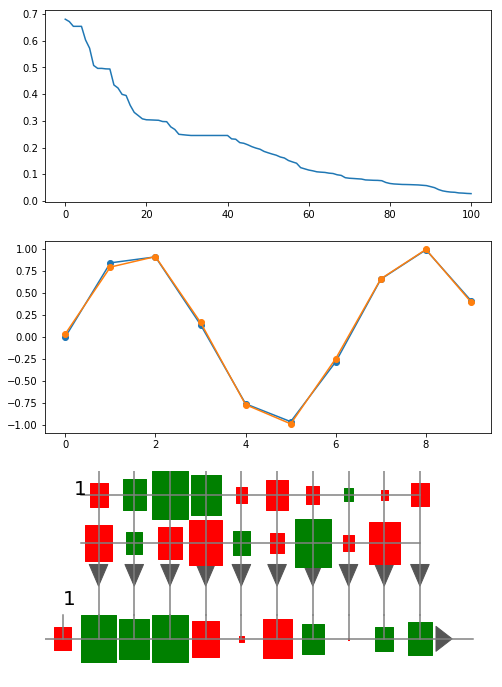

In [4]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

Now extract the parts of the neural network code that refer to the activation function and its derivative into two new methods.  Modify the code in *neuralnetworks.py* by adding these two methods to the ```NeuralNetwork``` class:

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)
        
    def activation_derivative(self, activation_value):
        return 1 - activation_value * activation_value
        
Now replace the code in the appropriate places in the ```NeuralNetwork``` class so that ```np.tanh``` is replaced with a call to the ```self.activation``` method and its derivative is replaced by calls to ```self.activation_derivative```. Tell jupyter to reload your changed code using the following lines.

## My Notes
Instructions: see above. Would have to override the method inside it. Need a different derivative when we do it. Any place where 1 - activation squared should be replaced with activation_derivative.


Below, have to import it again as a new import.


In [4]:
import imp
imp.reload(nn)

nnet = nn.NeuralNetwork(1, [10], 1)

In [5]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [6]:
[nnet.activation_derivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.07065082485316443,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.07065082485316443]

In [7]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue 0.18602791140657582 Scale 0.002693363969868201
SCG: Iteration 20 fValue 0.05804948574678485 Scale 2.6302382518244152e-06
SCG: Iteration 30 fValue 0.0388237474039478 Scale 2.5685920427972805e-09
SCG: Iteration 40 fValue 0.022956471354536757 Scale 5.0167813335884385e-12
SCG: Iteration 50 fValue 0.016096423417580375 Scale 4.8992005210824595e-15
SCG: Iteration 60 fValue 0.014504719989421952 Scale 1.6e-14
SCG: Iteration 70 fValue 0.014504719989421952 Scale 1.6777216e-08
SCG: Iteration 80 fValue 0.012417086856609912 Scale 0.004398046511104
SCG: Iteration 90 fValue 0.010361349819427426 Scale 4.294967296e-06
SCG: Iteration 100 fValue 0.009816566371544778 Scale 0.001099511627776


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0339 seconds. Final error is 0.09907858684672878.

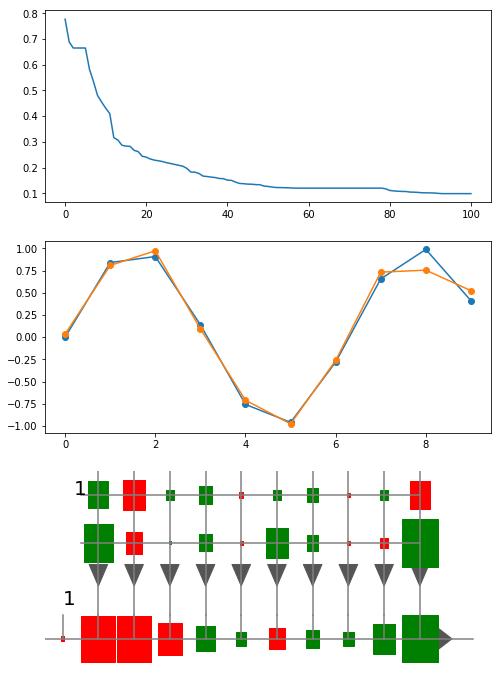

In [8]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations

### Example with Toy Data

Using your new ```NeuralNetwork``` class, you can compare the error obtained on a given data set by looping over various hidden layer structures.  Here is an example using the simple toy data from above.

In [9]:
nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [10]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [11]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

In [12]:
import pandas as pd

In [13]:
def run_parameters(Xtrain, Ttrain, Xtest, Ttest, epochs_list, nh_list, verbose=True):

    n_inputs = Xtrain.shape[1]  # number of columns in X
    n_outputs = Ttrain.shape[1]  # number of columns in T
    
    results = pd.DataFrame(columns=['Epochs', 'Hidden Units', 'RMSE Train', 'RMSE Test'])
    for n_epochs in epochs_list:        
        for nh in nh_list:
            nnet = nn.NeuralNetwork(Xtrain.shape[1], nh, n_outputs)
            nnet.train(Xtrain, Ttrain, n_epochs)
            Ytrain = nnet.use(Xtrain)
            Ytest = nnet.use(Xtest)
            results.loc[len(results)] = [n_epochs, nh, rmse(Ytrain, Ttrain), 
                                         rmse(Ytest, Ttest)]
            if verbose:
                display(results.tail(1))  # not print
    return results

In [14]:
results = run_parameters(Xtrain, Ttrain, Xtest, Ttest, [10, 100], [[0], [10], [10, 10]])

,Epochs,Hidden Units,RMSE Train,RMSE Test
0,10,[0],0.541608,1.029781


,Epochs,Hidden Units,RMSE Train,RMSE Test
1,10,[10],0.387781,0.38764


,Epochs,Hidden Units,RMSE Train,RMSE Test
2,10,"[10, 10]",0.467083,0.815173


,Epochs,Hidden Units,RMSE Train,RMSE Test
3,100,[0],0.541608,1.029781


,Epochs,Hidden Units,RMSE Train,RMSE Test
4,100,[10],0.000005,0.341202


,Epochs,Hidden Units,RMSE Train,RMSE Test
5,100,"[10, 10]",0.000425,0.372041


In [15]:
results

,Epochs,Hidden Units,RMSE Train,RMSE Test
0,10,[0],0.541608,1.029781
1,10,[10],0.387781,0.387640
2,10,"[10, 10]",0.467083,0.815173
3,100,[0],0.541608,1.029781
4,100,[10],0.000005,0.341202
5,100,"[10, 10]",0.000425,0.372041


In [16]:
hiddens = [[0]] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
hiddens

[[0],
 [1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [5],
 [5, 5],
 [5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5, 5],
 [10],
 [10, 10],
 [10, 10, 10],
 [10, 10, 10, 10],
 [10, 10, 10, 10, 10],
 [20],
 [20, 20],
 [20, 20, 20],
 [20, 20, 20, 20],
 [20, 20, 20, 20, 20],
 [50],
 [50, 50],
 [50, 50, 50],
 [50, 50, 50, 50],
 [50, 50, 50, 50, 50]]

In [17]:
results = run_parameters(Xtrain, Ttrain, Xtest, Ttest, [500], hiddens, verbose=False)
results

,Epochs,Hidden Units,RMSE Train,RMSE Test
0,500,[0],5.416079e-01,1.029781
1,500,[1],4.560940e-01,0.902303
2,500,"[1, 1]",4.560869e-01,0.902301
3,500,"[1, 1, 1]",4.560869e-01,0.902301
4,500,"[1, 1, 1, 1]",4.560869e-01,0.902301
5,500,"[1, 1, 1, 1, 1]",4.560869e-01,0.902301
6,500,[5],2.008548e-09,0.307171
7,500,"[5, 5]",2.090762e-09,0.347518
8,500,"[5, 5, 5]",8.749549e-09,0.325134
9,500,"[5, 5, 5, 5]",1.479444e-09,0.257220


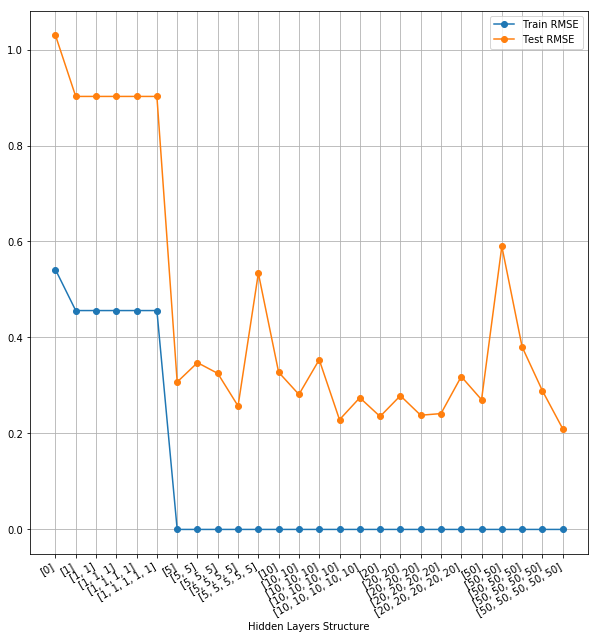

In [18]:
errors = np.array(results[['RMSE Train', 'RMSE Test']])
plt.figure(figsize=(10, 10))
plt.plot(errors, 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.xlabel('Hidden Layers Structure')
plt.grid(True)

For this data (and the random shuffling of the data used when this notebook was run and random assignment of initial weight values), `[20, 20, 20, 20, 20]` produced the lowest test error.  

Now, using the best hidden layer structure found, write the code that varies the number of training epochs and plot 'RMSE Train' and 'RMSE Test' versus the number of epochs.

### Experiments with Automobile Data

Now, repeat the above steps with the automobile mpg data we have used before.  Set it up to use 

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

## Experiments with relu activation function

Now define the ```NeuralNetwork_relu``` class by extending ```NeuralNetwork``` and simply redefine the ```activation``` and ```activation_derivative``` methods.  Feel free to search the net for examples of how to define these functions.  Try keywords like *relu derivative python*.  Acknowledge the sites that you find helpful.

Your `NeuralNetwork_relu` class must be defined in your `neuralnetworks.py` file.

Write and run the code that repeats the above experiments with the auto-mpg data using `NeuralNetwork_relu` to evaluate different hidden layer structures and different numbers of epochs. To accomplish this, define a new function named `run_parameters_act` that has a new fifth argument to `run_parameters` called `activation_functions` that is passed a list with value `['tanh']`, `['relu']`, or `['tanh', 'relu']` to try both activation functions. In the body of `run_parameters_act` you must create and train the appropriate neural network based on the value of that parameter. The pandas DataFrame returned by `run_parameters_act` must include a column named 'Activation'.

Sort the results by the 'RMSE Test'.  Pick one value of number of epochs that tends to produce the lowest 'RMSE Test' and select all rows of results for that number of epochs.  Make one plot that shows the 'RMSE Test' versus hidden layer structure with one curve for 'tanh' and one curve for 'relu'.  Use the `plt.legend` function to add a legend to the plot.

## Text descriptions

As always, discuss your results on the auto-mpg data.  Discuss which hidden layer structures, numbers of iterations, and activation functions seem to do best.  Your results will vary with different random partitions of the data. Investigate and discuss how much the best hidden layer structure and number of training iterations vary when you repeat the runs.

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A3grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A3grader.tar) and extract `A3grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  80 / 80 if your functions and class are defined correctly. The remaining 20 points will be based on the results you obtain from the comparisons of hidden layer structures and numbers of training iterations on the automobile data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A3.ipynb` with `Lastname` being your last name, and then save this notebook. Define both neural network classes, `NeuralNetwork` and `NeuralNetwork_relu` in the file named `neuralnetworks.py`.

Combine your notebook and `neuralnetwork.py` into one zip file or tar file.  Name your tar file `Lastname-A3.tar` or your zip file `Lastname-A3.zip`.  Check in your tar or zip file using the `Assignment 3` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.

In [23]:
%run -i A3grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'A3 Neural Network Regression and Activation Functions.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing:
import neuralnetworks as nn
nnet = nn.NeuralNetwork(4, [10], 1)
acts = nnet.activation(np.array([-0.5, 1.5]))

--- 10/10 points. nnet.activation() is correct.

Testing:
dacts = nnet.activation_derivative([-0.46211716  0.90514825])

--- 10/10 points. nnet.activation_derivative() is correct.

Testing:
import neuralnetworks as nn
nnet_relu = nn.NeuralNetwork_relu(4, [10], 1)
acts = nnet_reul.activation(np.array([-0.5, 1.5]))

--- 10/10 points. nnet.activation() is correct.

Testing:
dacts = nnet_relu.activation_derivative([0.  1.5])

--- 10/10 points. nnet.activation_derivative() is correct.

Testing:
data = np.loadtxt('machine.data', delimiter=',', usecols=range(2, 10))
X = data[:, :4]
T = data[:, -2

## Extra Credit

Create yet another version of the neural network class, called ```NeuralNetwork_logistic```, that uses the `logistic` activation function and its derivative, and repeat the above comparisons.